## 머신 러닝 개념

### 인공지능(AI) 분류
#### [1] 규칙기반 AI : rule-based system , 수동으로 규칙(특징)을 입력하면 기계가 추론, Prolog, LISP
#### [2] 학습기반 AI : 머신 러닝(Machine Learning), 데이터를 입력하면 기계가 스스로 새로운 특징을 학습하고 예측

### 머신러닝 분류

#### [1] 지도학습(Supervised Learning) : 답이 주어진 상태에서 학습
* 회귀(Regression)
* 분류(Classification) 

#### [2] 비지도학습(Unsupervised Learning) : 답을 모르고 학습
* 군집화(Clustering)
* 차원 축소(Dimension Reduction) : PCA(주성분 분석, Pricipal Component Analysis)

#### [3] 강화 학습(Reinforcement Learning) : 답을 모르고 있는 상태에서 답을 알아가는 강한 인공지능(자아를 갖음, 인간수준)
게임, 알파고(DQN)

### 회귀 (Regression) 모델
#### [1] 선형 회귀(Linear Regression) : 1차 함수, 직선의 방정식 
#### [2] 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값 , 회귀 계수
#### [3] 편향(Bias) : 기본 출력 값이 활성화 되는 정도를 설정, y 절편, 회귀 계수
#### [4] 비용함수(Cost Function) : 2차 함수, 포물선의 방정식, (예측값 - 실제값)^2
* cost(비용) = 오차 = 에러 = 손실(loss)
* cost(W,b) = (H(x) - y)^2

#### [5] 예측(가설,Hypothesis) 함수: predict,  H(x) : 예측 값,  y:답,결정값,target,label,     x:입력,feature(피쳐)
* H(X) = W*X + b

#### [6] 경사 하강법(Gradient Descent Algorithm)
#### : 비용이 가장 작은 기울기 값을 구하는 알고리즘

w:-1, cost: 18.666666666666668
w:0,  cost: 4.666666666666667
w:1,  cost: 0.0
w:2,  cost: 4.666666666666667
w:3,  cost: 18.666666666666668


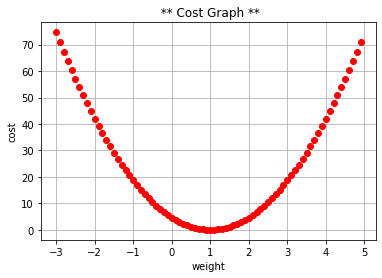

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비용함수의 구현
def cost(x,y,w):     
    c = 0
    for k in range(len(x)):
        hx = w * x[k]           # 예측 함수
        loss = (hx - y[k])**2   # 비용함수 ,(예측값 - 실제값)^2
        c += loss
    return c/len(x)             # 평균 제곱 오차   

x = [1,2,3]   # 입력 값  ,         독립 변수
y = [1,2,3]   # 실제값,답, target, 종속 변수

print('w:-1, cost:',cost(x,y,-1))   # hx = [-1,-2,-3]
print('w:0,  cost:',cost(x,y,0))    # hx = [0,0,0]
print('w:1,  cost:',cost(x,y,1))    # hx = [1,2,3]  , cost: 0.0
print('w:2,  cost:',cost(x,y,2))    # hx = [2,4,6]  
print('w:3,  cost:',cost(x,y,3))    # hx = [3,6,9] 

# 비용함수 시각화 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식
for k in range(-30,50):
    w = k/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')
    
plt.title(' ** Cost Graph **') 
plt.xlabel('weight')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### 미분 : 순간 변화량,기울기, x 축으로 1 만큼 움직였을 때 y 축으로 움직인 거리
#### 함수 미분 공식 정리 :  f(x) = x ^n   ===>  f'(x) = n*x^(n-1)
* y = 3            ===>    y' = 0
* y = 2*x          ===>    y' = 2
* y = x^2          ===>    y' = 2*x
* y = (x + 1)^2    ===>    y' = 2*(x + 1)
#### ( y = x^2 + 2*x + 1  ===>  y' = 2*x + 2 = 2*(x + 1)

In [12]:
# 경사 하강법 알고리즘 함수 구현, 미분 적용
# W :  W - (학습률)* 미분값     ==> 가중치를 업데이트한다
def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx - y[i])*x[i]  # 곱하기 2를 생략한 비용함수의 미분 공식
        c += loss
        # 비용함수의 미분 : cost(w) = (w*x[i] - y[i])^2 의 미분
        # (a + b)^2 = a^2 + 2*a*b + b^2
        # cost(w) = w^2 * x[i]^2 - 2 * w * x[i] * y[i] + y[i]^2
        # cost'(w) = 2*w*x[i]^2 - 2 * x[i] * y[i] = 2*x[i]*(w*x[i] - y[i]) ==> (hx - y[i])*x[i]
    return c/len(x) 

# x = [1,2,3,4,5]
# y = [2.1,3.2,4.3,5.5,6.6]

# 학습(train,fit) 시작
print('--------- start learning!!')
w,old = 10,100
for i in range(1000):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad       # 0.1 :학습률(learning rate), 하이퍼 파라메터, 가중치의 업데이트 실행
    print('[%3d]'%i, 'cost:',c,'old')
#     if c == old :       # cost 가 더이상 줄지 않을 때
    if c >= old and abs(c - old)< 1.0e-15:   # cost가 1.0e-15 값 보다도 더 줄지 않을 때
        break
    old = c
    
print('--------- end learning!!')   
print('weight:',w,'train:',i,'회')

--------- start learning!!
[  0] cost: 378.0 old
[  1] cost: 107.51999999999998 old
[  2] cost: 30.583466666666666 old
[  3] cost: 8.69929718518518 old
[  4] cost: 2.47446675489712 old
[  5] cost: 0.7038483213929583 old
[  6] cost: 0.2002057447517751 old
[  7] cost: 0.05694741184050483 old
[  8] cost: 0.016198374923521403 old
[  9] cost: 0.004607537756023892 old
[ 10] cost: 0.0013105885172690224 old
[ 11] cost: 0.0003727896226898598 old
[ 12] cost: 0.0001060379371206724 old
[ 13] cost: 3.0161902114324568e-05 old
[ 14] cost: 8.579385490296031e-06 old
[ 15] cost: 2.4403585394623746e-06 old
[ 16] cost: 6.941464290019953e-07 old
[ 17] cost: 1.9744609536079287e-07 old
[ 18] cost: 5.616244490256599e-08 old
[ 19] cost: 1.597509543893363e-08 old
[ 20] cost: 4.544027147100321e-09 old
[ 21] cost: 1.292523277397425e-09 old
[ 22] cost: 3.6765106557353845e-10 old
[ 23] cost: 1.0457630309680019e-10 old
[ 24] cost: 2.974614843652282e-11 old
[ 25] cost: 8.461126664488492e-12 old
[ 26] cost: 2.40672047

In [ ]:
# Linear Regression
# 알고리즘 구현 : 비용함수와 경사 하강법 알고리즘 함수 구현
# (1) 비용함수의 구현
def cost(x,y,w):     
    c = 0
    for k in range(len(x)):
        hx = w * x[k]           # 예측 함수
        loss = (hx - y[k])**2   # 비용함수 ,(예측값 - 실제값)^2
        c += loss
    return c/len(x)             # 평균 제곱 오차   

# (2) 경사 하강법 알고리즘 함수 구현
def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx - y[i])*x[i]  # 곱하기 2를 생략한 비용함수의 미분 공식
        c += loss
        # 비용함수의 미분 : cost(w) = (w*x[i] - y[i])^2 의 미분
        # (a + b)^2 = a^2 + 2*a*b + b^2
        # cost(w) = w^2 * x[i]^2 - 2 * w * x[i] * y[i] + y[i]^2
        # cost'(w) = 2*w*x[i]^2 - 2 * x[i] * y[i] = 2*x[i]*(w*x[i] - y[i]) ==> (hx - y[i])*x[i]
    return c/len(x) 

# (3) 학습(fit) 함수 구현
def fit(x,y):
    print('--------- start learning!!')
    w,old = 10,100
    for i in range(1000):
        c = cost(x,y,w)
        grad = gradient_descent(x,y,w)
        w -= 0.1*grad       # 0.1 :학습률(learning rate), 하이퍼 파라메터, 가중치의 업데이트 실행
        print('[%3d]'%i, 'cost:',c,'old')
        if c >= old and abs(c - old)< 1.0e-15:   # cost가 1.0e-15 값 보다도 더 줄지 않을 때
            break
        old = c
    print('--------- end learning!!') 
    return w

# (4) 예측(predict) 함수 구현    
def predict(x,w):
    hx = w*np.array(x)
    return list(hx)

# (5) 정확도(평가지표) 측정 함수 구현 : 정확도 검증(validation)
# <1> 분류(classification) 일때 : 정확도(%)
def get_accuarcy(w,x_test,y_test):
    y_predict = predict(w,x_test)
    print(y_predict)
    correct = 0
    for k,_ in enumerate(y_test):
        if y_test[k] == y_predict[k]:
            correct += 1
    accuracy = round(correct/len(y_test),2)
    return accuracy

# <2> 회귀(Linear Regression) 일때 : RMSE(Root Mean Squared Error,평균 제곱근 오차)
def get_rmse(w,x_test,y_test):
    y_predict = predict(w,x_test)
    print(y_predict)
    squared_error = 0
    for k,_ in enumerate(y_test):
        squared_error += (y_predict[k] - y_test[k])**2
    mse = squared_error/len(y_test)    
    rmse = np.sqrt(mse)
    return rmse 
    